In [2]:
import pandas as pd
import numpy as np

names = [
    "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | "]
names = [i.split(' | ') for i in names][0]

In [3]:
movie_data = pd.read_csv("resource/u.item", delimiter="|", encoding="437", names=names)
movie_data['video release date'] = movie_data['release date']
rating_data = pd.read_csv("resource/u.data", delimiter="\t", names=["user id", "item id", "rating", "timestamp"])

In [4]:
rating_data = rating_data.rename(columns={'item id': 'movie id'})
movie_data = movie_data.drop('', axis=1)

In [5]:
# Merge Dataframes
full_data = movie_data.merge(rating_data, on='movie id', how="inner")
user_data = pd.read_csv("resource/u.user", delimiter="|", names=["user id", "age", "gender", "occupation", "zip code"])

In [6]:
# Observe NaN
full_data[full_data.isnull().any(1)]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
40710,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,130,5,875801239
40711,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,5,4,875635064
40712,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,268,3,875742077
40713,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,297,3,875409139
40714,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,319,4,875707690
40715,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4,875692955
40716,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,532,3,875441348
40717,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,833,1,875655669
40718,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,422,4,875655986
98803,1358,The Deadly Cure (1996),16-Sep-1996,16-Sep-1996,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,288,5,886892241


In [7]:
# drop record containing NaN
full_data = full_data.dropna(axis=0, subset=['release date']).reset_index().drop('index', axis=1)
full_data.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,3,883601324


In [8]:
# Separate title with release year
full_data['release date'] = full_data['movie title'].str.split('(').str[1].str.replace(')', '')
full_data['movie title'] = full_data['movie title'].str.split('(').str[0]

In [9]:
full_data = full_data.drop('video release date', axis=1)
full_data = full_data.drop('IMDb URL', axis=1)

In [10]:
full_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,66,3,883601324


In [11]:
genres_titles = np.array(full_data.columns[3:22])
genres_titles

array(['unknown', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'], dtype=object)

In [12]:
#generation of this modified data from above original data is explained(github link: )  
new_user_profiles = pd.read_csv('new_user_profiles.csv')
# new_movie_profiles = pd.read_csv('new_movie_profiles.csv')

In [13]:
new_user_profiles.head(10)

,user id,gender,age,occupation,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy count,Film-Noir count,Horror count,Musical count,Mystery count,Romance count,Sci-Fi count,Thriller count,War count,Western count
0,1,M,24,technician,0.0,3.333333,2.928571,3.333333,2.200000,3.472527,...,2,1,13,13,5,44,43,52,25,6
1,2,F,53,other,0.0,3.800000,4.333333,4.000000,3.000000,3.733333,...,1,2,2,1,4,16,4,12,3,0
2,3,M,23,writer,0.0,2.785714,3.666667,0.000000,0.000000,2.583333,...,0,2,5,2,11,5,7,20,5,0
3,4,M,24,technician,0.0,3.714286,3.500000,0.000000,0.000000,5.000000,...,0,0,1,0,5,3,6,11,2,0
4,5,F,33,other,0.0,3.142857,3.312500,3.785714,2.500000,3.000000,...,2,1,28,12,3,19,33,19,14,2
5,6,M,42,executive,0.0,3.360000,3.454545,3.400000,3.105263,3.523077,...,3,6,4,13,12,41,13,24,21,5
6,7,M,57,administrator,0.0,3.884211,4.000000,4.461538,4.055556,3.827586,...,7,11,47,26,21,56,48,77,41,18
7,8,M,36,administrator,0.0,4.078947,3.823529,0.000000,1.333333,2.400000,...,0,1,1,0,1,7,17,17,11,3
8,9,M,29,student,0.0,5.000000,5.000000,0.000000,0.000000,4.500000,...,0,0,1,0,1,8,3,4,5,0
9,10,M,53,lawyer,0.0,4.280000,4.357143,4.142857,4.250000,3.934783,...,1,9,6,14,15,36,12,34,20,5


In [14]:
new_user_profiles['gender'].replace(['F','M'],[0,1],inplace=True)
new_user_profiles.head()

,user id,gender,age,occupation,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy count,Film-Noir count,Horror count,Musical count,Mystery count,Romance count,Sci-Fi count,Thriller count,War count,Western count
0,1,1,24,technician,0.0,3.333333,2.928571,3.333333,2.2,3.472527,...,2,1,13,13,5,44,43,52,25,6
1,2,0,53,other,0.0,3.800000,4.333333,4.000000,3.0,3.733333,...,1,2,2,1,4,16,4,12,3,0
2,3,1,23,writer,0.0,2.785714,3.666667,0.000000,0.0,2.583333,...,0,2,5,2,11,5,7,20,5,0
3,4,1,24,technician,0.0,3.714286,3.500000,0.000000,0.0,5.000000,...,0,0,1,0,5,3,6,11,2,0
4,5,0,33,other,0.0,3.142857,3.312500,3.785714,2.5,3.000000,...,2,1,28,12,3,19,33,19,14,2


In [15]:
#for k, rows in new_user_profiles.groupby('age'):
 
def count_rows(rows):
    return len(rows)

user_by_age = new_user_profiles.groupby('age').apply(count_rows)

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Particiaption Vs Age - MovieLens_100k')

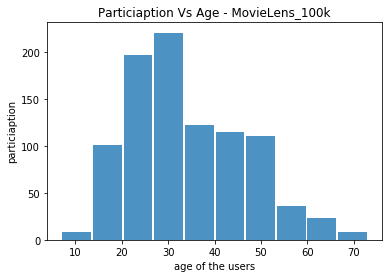

In [16]:
%pylab inline
import seaborn

hist(new_user_profiles.age, bins=10, rwidth=0.94, alpha = 0.8)
xlabel('age of the users')
ylabel('particiaption')
title('Particiaption Vs Age - MovieLens_100k')

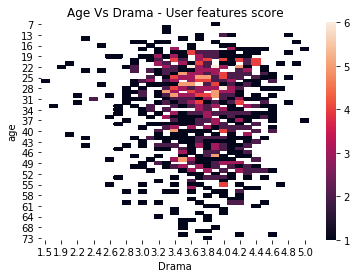

In [17]:
decimals = pd.Series([1], index=['unknown', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'])
rounded_scores = new_user_profiles.round(decimals)
# rounded_scores.head()
age_feature_count = rounded_scores.groupby(["age","Drama"]).apply(count_rows).unstack()
seaborn.heatmap(age_feature_count)
title("Age Vs Drama - User features score");

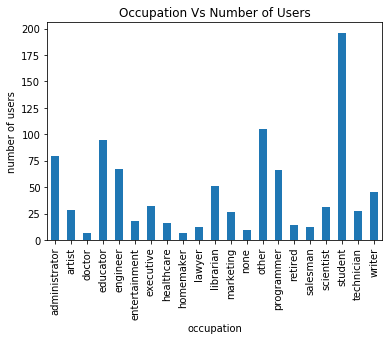

In [26]:
# by_occupation = rounded_scores.groupby(["age","Action"]).apply(count_rows).unstack()
by_occupation = new_user_profiles.groupby('occupation').apply(count_rows)
# by_occupation
new_user_profiles.groupby('occupation').apply(count_rows).plot(kind='bar', title='Occupation Vs Number of Users')
ylabel('number of users');

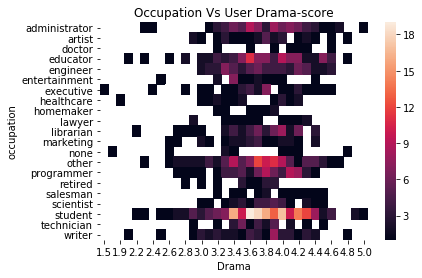

In [43]:
occupation_feature_count = rounded_scores.groupby(["occupation","Drama"]).apply(count_rows).unstack()
seaborn.heatmap(occupation_feature_count)
title("Occupation Vs User Drama-score");
# 'unknown', 'Action', 'Adventure', 'Animation', "Children's",
# 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
# 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

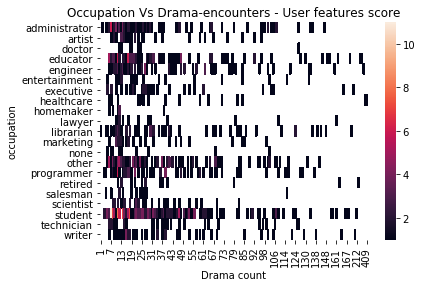

In [48]:
occupation_feature_watch_count = rounded_scores.groupby(["occupation","Drama count"]).apply(count_rows).unstack()
seaborn.heatmap(occupation_feature_watch_count)
title("Occupation Vs Drama-encounters - User features score");
# 'unknown', 'Action', 'Adventure', 'Animation', "Children's",
# 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
# 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

In [21]:
occupation_feature_total = pd.read_csv('occupation_feature_total.csv')
occupation_feature_total

,occupation,unknown count,Action count,Adventure count,Animation count,Children's count,Comedy count,Crime count,Documentary count,Drama count,Fantasy count,Film-Noir count,Horror count,Musical count,Mystery count,Romance count,Sci-Fi count,Thriller count,War count,Western count
0,technician,0,1073,556,131,220,1047,274,24,1287,38,45,163,174,177,641,531,789,383,89
1,other,0,2660,1424,419,872,3139,818,61,4255,143,146,530,562,574,2158,1241,2308,997,170
2,writer,0,1290,670,175,364,1561,496,45,2185,71,125,452,270,334,1002,670,1296,444,94
3,executive,1,801,436,91,231,939,284,26,1395,50,58,154,131,202,587,389,805,312,49
4,administrator,0,1846,1016,202,458,2180,563,46,3060,92,145,389,351,381,1522,941,1556,780,168
5,student,0,6365,3339,911,1747,6889,1824,115,7705,350,265,1328,1073,1002,4126,3059,5095,1766,408
6,lawyer,0,280,141,35,82,456,107,10,537,14,36,60,72,78,268,141,243,142,35
7,educator,0,1958,1124,261,586,2687,706,96,4240,111,201,419,478,528,1985,984,1757,1001,189
8,scientist,0,563,283,61,106,530,177,16,916,19,37,69,91,119,433,318,461,254,24
9,entertainment,0,498,248,62,103,569,207,23,797,24,47,191,68,132,339,289,551,173,27


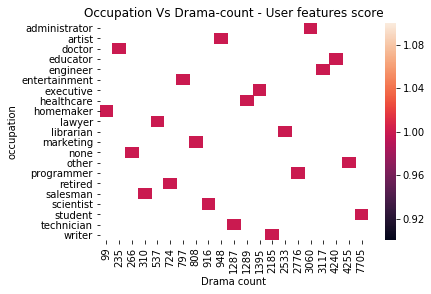

In [22]:
occupation_total = occupation_feature_total.groupby(["occupation","Drama count"]).apply(count_rows).unstack()
seaborn.heatmap(occupation_total)
title("Occupation Vs Drama-count - User features score");

In [23]:
only_features = occupation_feature_total.iloc[:,1:19]
# only_features
occupation_feature_total['max feature'] = only_features.idxmax(axis=1)
occupation_feature_total

,occupation,unknown count,Action count,Adventure count,Animation count,Children's count,Comedy count,Crime count,Documentary count,Drama count,...,Film-Noir count,Horror count,Musical count,Mystery count,Romance count,Sci-Fi count,Thriller count,War count,Western count,max feature
0,technician,0,1073,556,131,220,1047,274,24,1287,...,45,163,174,177,641,531,789,383,89,Drama count
1,other,0,2660,1424,419,872,3139,818,61,4255,...,146,530,562,574,2158,1241,2308,997,170,Drama count
2,writer,0,1290,670,175,364,1561,496,45,2185,...,125,452,270,334,1002,670,1296,444,94,Drama count
3,executive,1,801,436,91,231,939,284,26,1395,...,58,154,131,202,587,389,805,312,49,Drama count
4,administrator,0,1846,1016,202,458,2180,563,46,3060,...,145,389,351,381,1522,941,1556,780,168,Drama count
5,student,0,6365,3339,911,1747,6889,1824,115,7705,...,265,1328,1073,1002,4126,3059,5095,1766,408,Drama count
6,lawyer,0,280,141,35,82,456,107,10,537,...,36,60,72,78,268,141,243,142,35,Drama count
7,educator,0,1958,1124,261,586,2687,706,96,4240,...,201,419,478,528,1985,984,1757,1001,189,Drama count
8,scientist,0,563,283,61,106,530,177,16,916,...,37,69,91,119,433,318,461,254,24,Drama count
9,entertainment,0,498,248,62,103,569,207,23,797,...,47,191,68,132,339,289,551,173,27,Drama count


In [24]:
occupations_list = occupation_feature_total.occupation.values
column_names = np.array(full_data.columns[3:22])
totals_list = []
for i in range(0, 20, 1):
    totals_list.append(occupation_feature_total.iloc[i,1:].values)
column_names

array(['unknown', 'Action', 'Adventure', 'Animation', "Children's",
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'], dtype=object)

ValueError: x and y must have same first dimension, but have shapes (19,) and (20,)

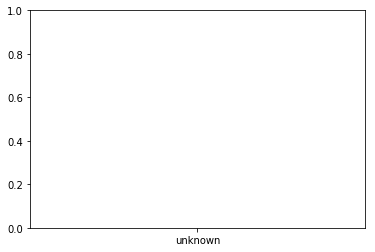

In [28]:
import matplotlib.patches as mpatches

fig,ax = plt.subplots()
# ax.plot(column_names, totals_list[0], '-o', ms=5, lw=1, color='red', alpha=0.7, mfc='red')
ax.plot(column_names, totals_list[5], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='green')
ax.plot(column_names, totals_list[19], '-o', ms=5, lw=1, color='blue', alpha=0.7, mfc='blue')
ax.plot(column_names, totals_list[7], '-o', ms=5, lw=1, color='orange', alpha=0.7, mfc='orange')
ax.plot(column_names, totals_list[10], '-o', ms=5, lw=1, color='black', alpha=0.7, mfc='black')
# ax.plot(column_names, totals_list[5], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[6], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[7], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[8], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[9], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[10], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[11], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[12], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[13], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[14], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[15], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[16], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[17], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[18], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
# ax.plot(column_names, totals_list[19], '-o', ms=5, lw=1, color='green', alpha=0.7, mfc='orange')
ax.grid()

red_patch = mpatches.Patch(color='red', label='Technicians')
green_patch = mpatches.Patch(color='green', label='Students')
blue_patch = mpatches.Patch(color='blue', label='Salesman')
yellow_patch = mpatches.Patch(color='orange', label='Educator')
black_patch = mpatches.Patch(color='black', label='Programmer')
plt.legend(handles=[red_patch,green_patch,blue_patch,yellow_patch,black_patch])
plt.xticks(rotation=90)
title("Occupations vs Feature wise total");

# position bottom right
# fig.text(0.95, 0.02, 'Lasitha Randunu',
#          fontsize=50, color='gray',
#          ha='right', va='bottom', alpha=1)

plt.show()

In [29]:
new_movie_profiles = pd.read_csv('new_movie_profiles.csv', encoding = 'iso-8859-1')

In [30]:
new_movie_profiles.head()

,movie id,title,watch count,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,451,0.0,0.000000,0.000000,3.880266,3.880266,3.880266,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,2,GoldenEye,130,0.0,3.207692,3.207692,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.207692,0.0,0.0
2,3,Four Rooms,89,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.056180,0.0,0.0
3,4,Get Shorty,208,0.0,3.557692,0.000000,0.000000,0.000000,3.557692,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,5,Copycat,85,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.305882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.305882,0.0,0.0


In [31]:
movie_genre_scores = new_movie_profiles.iloc[:,3:24]

C:\Users\Randunu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


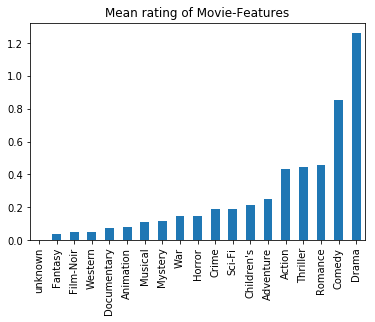

In [47]:
# movie_genre_scores.describe()
movie_genre_scores.describe().ix['mean'].sort_values().plot(kind='bar', title='Mean rating of Movie-Features');

C:\Users\Randunu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


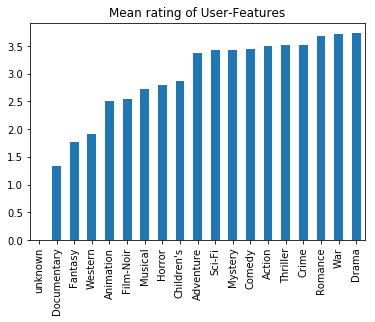

In [46]:
user_genre_scores = new_user_profiles.iloc[:,4:23]
user_genre_scores.describe().ix['mean'].sort_values().plot(kind='bar', title='Mean rating of User-Features');

In [34]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5)

In [35]:
ordered_user_profiles = new_user_profiles[['user id', 'occupation', 'gender', 'age', 'unknown', 'Action', 'Adventure', 'Animation', "Children's",
             'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'unknown count', 'Action count', 'Adventure count',
             'Animation count', "Children's count", 'Comedy count', 'Crime count', 'Documentary count', 'Drama count',
             'Fantasy count', 'Film-Noir count', 'Horror count', 'Musical count', 'Mystery count', 'Romance count',
             'Sci-Fi count', 'Thriller count', 'War count', 'Western count']]

ordered_user_profiles.head()

,user id,occupation,gender,age,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy count,Film-Noir count,Horror count,Musical count,Mystery count,Romance count,Sci-Fi count,Thriller count,War count,Western count
0,1,technician,1,24,0.0,3.333333,2.928571,3.333333,2.2,3.472527,...,2,1,13,13,5,44,43,52,25,6
1,2,other,0,53,0.0,3.800000,4.333333,4.000000,3.0,3.733333,...,1,2,2,1,4,16,4,12,3,0
2,3,writer,1,23,0.0,2.785714,3.666667,0.000000,0.0,2.583333,...,0,2,5,2,11,5,7,20,5,0
3,4,technician,1,24,0.0,3.714286,3.500000,0.000000,0.0,5.000000,...,0,0,1,0,5,3,6,11,2,0
4,5,other,0,33,0.0,3.142857,3.312500,3.785714,2.5,3.000000,...,2,1,28,12,3,19,33,19,14,2


In [36]:
ordered_user_profiles = new_user_profiles[['user id', 'occupation', 'gender', 'age', 'unknown', 'Action', 'Adventure', 'Animation', "Children's",
             'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'unknown count', 'Action count', 'Adventure count',
             'Animation count', "Children's count", 'Comedy count', 'Crime count', 'Documentary count', 'Drama count',
             'Fantasy count', 'Film-Noir count', 'Horror count', 'Musical count', 'Mystery count', 'Romance count',
             'Sci-Fi count', 'Thriller count', 'War count', 'Western count']]

In [37]:
x = ordered_user_profiles.iloc[:,2:42]
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

# colormap = np.arange(21)
# 'Green', 'Blue', 'Red', 'Yellow', 'Purple', 'Black'
colormap= np.array(['Green', 'Blue', 'Red', 'Yellow', 'Black'])
# model.labels_

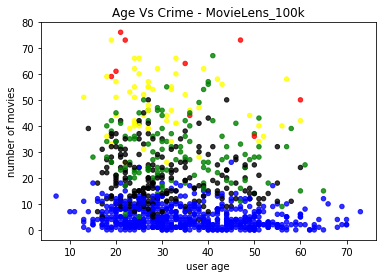

In [39]:
plt.scatter(x.iloc[:,1], x.iloc[:,23], c=colormap[model.labels_], s=20, alpha = 0.8)
xlabel('user age')
ylabel('number of movies')
title('Age Vs Crime - MovieLens_100k');

# 0'watch count', 1'unkown', 2'Action', 3'Adventure', 4'Animation', 5"Children's",
# 6'Comedy', 7'Crime', 8'Documentary', 9'Drama', 10'Fantasy', 11'Film-Noir', 12'Horror', 
# 13'Musical', 14'Mystery', 15'Romance', 16'Sci-Fi', 17'Thriller', 18'War', 19'Western'

In [40]:
# movie content evaluation through their overall feature scores

model2 = KMeans(n_clusters = 2)

x2 = new_movie_profiles.iloc[:,2:22]
model2.fit(x2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
colormap2 = np.array(['Green', 'Blue', 'Red', 'Yellow', 'Black'])
model2.labels_

array([1, 1, 0, ..., 0, 0, 0])

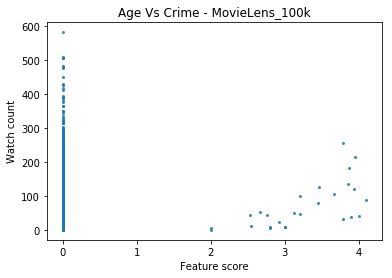

In [42]:
plt.scatter(x2.iloc[:,19], x2.iloc[:,0], s=4, alpha = 0.8)
xlabel('Feature score')
ylabel('Watch count')
title('Age Vs Crime - MovieLens_100k');

# 0'watch count', 1'unkown', 2'Action', 3'Adventure', 4'Animation', 5"Children's",
# 6'Comedy', 7'Crime', 8'Documentary', 9'Drama', 10'Fantasy', 11'Film-Noir', 12'Horror', 13'Musical', 14'Mystery',
# 15'Romance', 16'Sci-Fi', 17'Thriller', 18'War', 19'Western'